 # <center> Lecture7 : Posterior Inference &  Estimation  </center>  
 
 ## <center> Instructor: Dr. Hu Chuan-Peng  </center>

在第六课中，我们已经介绍了 PyMC 的基本用法。
- 其实，PyMC 就是一种 概率编程语言（PPL）框架，它帮助我们在 Python 中进行贝叶斯模型的构建和后验推断。
- 通过 PyMC，我们可以定义先验分布、设置似然函数、运行采样算法，并在采样后对模型结果进行可视化和诊断。
- PyMC 支持多种采样方法，如 MCMC（马尔可夫链蒙特卡洛），这使得 PyMC 在保持高效性的同时，能够处理更复杂的模型，满足多种统计建模需求。
- PyMC 只是 PPL 框架的一个代表，不同的 PPL 框架（如 Stan）在设计和功能上各有特色。


## 什么是概率编程语言（PPL，probabilistic programming language）

概率编程语言的关键在于自动进行概率分布（尤其是贝叶斯后验分布）的推理过程。

传统贝叶斯后验分布的推理过程中，我们需要定义先验，确定似然函数，然后使用 MCMC 等方法来计算后验分布。

```python
N = 10; Y = 9
x = np.linspace(0, 1, 10000)
pi = st.beta.pdf(x, alpha=2, beta=2)
likelihood = st.binom.pmf(Y, N, x)

posterior_unstandardized = likelihood * pi
# then we need MCMC to get the posterior distribution
# each iteration we will calculate posterior_unstandardized = likelihood * pi
mh_simulation = mh_tour(N=5000) 
```


对于概率编程语言，我们只需要定义先验和数据模型，然后就可以自动推断出后验分布。

```python
N = 10; Y = 9
with pm.Model() as bb_model:
    pi = pm.Beta('pi', alpha=2, beta=2)
    likelihood = pm.Binomial('likelihood', n=N, p=pi, observed=Y)
    trace = pm.sample(draws=5000)
```

可见，我们只需要在 PyMC 中定义似然函数模型 `likelihood` 之后使用 `pm.sample(draws=5000)` 就可以自动计算出后验分布, 而无需考虑如何使用 MCMC 等方法来计算后验分布。
- 其中  `likelihood = pm.Binomial('likelihood', n=N, p=pi, observed=Y)` 相等于公式 $likelihood = \text{Binomial}(\text{N}, \text{Y} | \pi)$。

<div style="padding-bottom: 30px;"></div>


PPL 框架还提供了其他更多的功能和特点，我们将在之后的课程中慢慢接触到：


| 功能           | 描述                                                          | 主要用途                      |
|-------------------------|---------------------------------------------------------------------------------------|--------------------------------------------------------|
| **模型定义**            | 用简洁语法定义先验分布和似然函数，支持分层模型   | 简化模型构建流程，灵活定义复杂结构        |
| **自动采样**            | 提供 MCMC (HMC、NUTS)、变分推断等多种近似算法     | 高效获取后验样本，适应高维复杂模型           |
| **自动微分**            | 自动计算梯度，支持高维复杂模型                | 加速模型优化，适应复杂计算需求                    |
| **诊断与调试**          | 提供 Trace Plot、R-hat 等诊断工具，检测采样质量与收敛性       | 确保采样结果可靠，识别采样问题                |
| **后验分析和可视化**    | 提供后验分布图、密度图、置信区间等可视化工具     | 直观理解参数分布和不确定性，辅助决策             |
| **后验预测**            | 从后验分布生成新观测数据，用于模型验证       | 检查模型合理性，评估预测效果               |
| **灵活建模扩展性**      | 支持模块化建模、集成外部工具，构建自定义模型        | 适应不同应用场景，增强模型的扩展性         |


### 贝叶斯概率编程中的核心术语

这些术语在贝叶斯统计和概率编程中具有重要应用。除了已经讲过的部分概念外，本节课将涉及一些新概念：


| 术语（中英文全称）                                     | 定义                                                                                  |
| --------------------------------------------- | ----------------------------------------------------------------------------------- |
| 先验分布（Prior Distribution）                      | 先验分布是指在观察数据之前，研究人员对模型中未知参数的初始信念。这种信念可以基于现有研究或试点数据形成。                                |
| 似然函数（Likelihood Function）                     | 似然函数是指特定参数下观测数据的概率，它是统计模型中选择参数的概率函数。例如，伯努利函数是描述硬币投掷统计的似然函数。                         |
| 后验分布（Posterior Distribution）                  | 后验分布是指在观察到数据后，根据贝叶斯规则平衡先验知识与观测数据，对参数的更新信念。                                          |
| 马尔可夫链蒙特卡洛方法（Markov Chain Monte Carlo, MCMC）   | MCMC是一种通过模拟来推断后验分布的采样方法。通过算法构建多个马尔可夫链，使得它们的平稳分布与感兴趣的后验分布相匹配，这个过程称为MCMC收敛。           |
| 有效样本大小（Effective Sample Size, ESS）            | 有效样本大小是指与N个自相关样本具有相同估计力的独立样本数量。ESS常用于判断MCMC链中的抽样数量是否足以保证可靠的估计不确定性。                  |
| Gelman-Rubin统计量（Gelman-Rubin Statistics, R̂）  | Gelman-Rubin统计量是链内变异性与链间变异性的比率。所有参数和感兴趣量接近1.0的值表明马尔可夫链蒙特卡洛算法已足够收敛到平稳分布。             |
| 最高密度区间（Highest Density Interval, HDI）         | 最高密度区间是贝叶斯统计中参数可信范围的估计。它包括后验分布中的一个区间，该区间内的每个点的密度都高于区间外的点。                           |
| 实践等效区间（Region of Practical Equivalence, ROPE） | 实践等效区间是预先定义的参数值范围，这些值被认为在实践上等同于零。用于判断参数估计是否显著不同于零。                                  |
| 贝叶斯因子（Bayes Factor, BF）                       | 贝叶斯因子量化了一个统计模型相对于另一个模型的证据强度。大于1的值表明相对于原始模型，替代模型得到了更多的支持。                            |
| 采样样本（Samples/Draws）                           | 采样样本值是指从后验分布中抽取的参数值，用作后验分布的近似，并通过蒙特卡洛积分获得后验分布的经验估计和感兴趣的汇总统计量。其采样结果在计算机术语中也称为 trace。 |
| 调试样本（Tune）                                    | 调试样本是指在MCMC抽样过程中用于达到平稳分布的初始阶段，此阶段的样本通常被丢弃，不在最终分析中使用。也叫做 Warmup 活 burn-in，燃烧样本。      |
| 链（Chains）                                     | 链是指来自单个MCMC链的一系列样本（或抽样值）。链用于诊断收敛性以及程序在特定应用中的其他潜在问题。                                 |



## 使用后验分布进行统计推断  

我们已经知道可以凭借 PyMC 等方法来得到后验，但更具体的后验能告诉我们什么呢？  

⭐这节课我们关注对 PyMC 等概率编程语言(PPL) 的输出结果进行分析，包括：

* MCMC诊断
* 后验估计  
* 假设检验  



<p align="center">
  <img src="https://cdn.kesci.com/upload/sm7veon5ei.png?imageView2/0/w/720/h/960" alt="Image Name">
</p>



### A Beta-Binomial example in PyMC 

我们依旧以随机点运动任务为例，其中每个试验中参与者判断正确的概率用 $\pi$ 表示。

**模型假设**

- 我们假设参与者判断正确的概率 $\pi$ 是从 **Beta 分布**中抽样的：

$$  
\begin{equation}  
\pi \sim \text{Beta}(\alpha, \beta)  
\end{equation}  
$$  

- 在每次试验中，参与者的成功次数 $Y$ 服从 **Binomial 分布**：

$$  
\begin{equation}  
Y \sim \text{Binomial}(n, \pi)  
\end{equation}  
$$  

其中，$n$是试验的总次数，$Y$是成功次数。

**模型设定**

在这个例子中，我们可以使用Beta-Binomial 模型来表示：

> 总试验数为N=10，成功次数为9 $(Y = 9)$  
> 先验分布为：$\pi    \sim \text{Beta}(2, 2)$  
> 似然函数为：$Y|\pi  \sim \text{Bin}(N, \pi)$  

对应的 PyMC 代码为：
```python
N = 10; Y = 9
with pm.Model() as bb_model:
    pi = pm.Beta('pi', alpha=2, beta=2)
    likelihood = pm.Binomial('likelihood', n=N, p=pi, observed=Y)
```

<div style="padding-bottom: 30px;"></div>

## 对马尔科夫链的诊断 (Markov chain diagnostics) 

当我们定义好 PyMC 模型后，就可以使用 `pm.sample()` 函数进行采样。

`trace`包含了所有参数的采样结果，即参数的后验分布的采样。

```python
with bb_model:
    trace = pm.sample(draws=5000)
```

但使用这些采样结果前，我们需要回答一个问题：这些采样结果是否可信？🤔

由于这些采样来自于 MCMC 算法，即马尔科夫链蒙特卡洛算法，而模拟采样方法的关键是 "近似 "和 "收敛"  。

这就引出了以下问题：  

- 好的马尔可夫链是什么样的？  
- 如何判断马尔可夫链样本是否产生了合理的后验近似值？  
- 马尔可夫链样本量应该多大？  

诊断的意义：确定好的trace的标准，为我们不知道真实的后验时作为标准进行推断。

在本节中，我们将重点介绍几种诊断方法：

- 可视化诊断：轨迹图 (trace plot)和平行链 (parallel chains)。  
- 量化诊断指标：有效样本大小 ESS(effective sample size)、自相关性 (autocorrelation)和 $\hat{R}$ (R-hat)。  
    
> 这些诊断方法的使用应综合考虑。没有一种视觉或数值诊断方法是万能的，通常要一起考虑。

### trace plots  

轨迹图 (trace plot) 是一种可视化方法，用于显示马尔可夫链的轨迹，即马尔可夫链在参数空间中的位置。  
- 图中的横坐标是时间步长，纵坐标是参数的值。  
- 轨迹图往往结合参数的后验分布一起展示，以便于观察采样样本对于参数分布的代表性。

我们先来看一下正常的轨迹图是什么样：  


![Image Name](https://cdn.kesci.com/upload/s2le92xkaq.png?imageView2/0/w/500/h/500)  

- 这是之前 Beta-Binomial model 的示例。  
- 上图：轨迹图看起来像一堆白噪声，没有明显的趋势或现象，这意味着**链是稳定的**。  
- 下右：展示了正常的参数后验分布的情况。

<div style="padding-bottom: 30px;"></div>

一个糟糕的轨迹图可能看起来像这。显然这种条件下的后验参数分布在用于后续推断时是必须非常谨慎的：  


![Image Name](https://cdn.kesci.com/upload/s2le9nbz6q.png?imageView2/0/w/450/h/450)  

图中上部分链 A：  

- 链 A 中的轨迹图显示，它在 5000 次迭代后还没有稳定下来，并且它只探索了 0.6 到 0.9 之间的参数值。  
  - 下降趋势也暗示着链值之间存在着很强的相关性--它们看起来并不像独立的噪音。  
  - 虽然马尔可夫链本身具有依赖性，但它们越像噪声(独立样本的表现)，得出的后验近似值误差就越小（粗略地说）。  
- 结合后验分布图：**它的后验近似值高估了真实分布中央部分，而完全低估了这个范围之外值的可信度**。  

图中下部分链 B：   
- 链 B 表现出不同的问题，迹线图中的部分区域存在**两条完全·平直的线**所显示的那样，  
  - 这意味着，**当它采样到较小的参数值时，往往会陷入这个值的附近，** 这也表明了一种局部的高相关性。  
  - 链条 B 在陷入困境时，会对后验参数左侧尾部的值进行**过度采样**。         
- 结合密度图  
  - 虽然链 B 后验分布和真实分布的重合性更好，但它存在多峰分布，原因在于过度采样。

<div style="padding-bottom: 30px;"></div>

如果我们得到一个糟糕的轨迹图，如何进行补救📍：  

- 1. 检查模型。确定假定的**先验模型**和**数据模型**是否合适？    
- 2. 对数据链进行**更多迭代**。一些不理想的短期连锁趋势可能会在长期内得到改善。

### 有效样本大小 ESS(effective sample size)和自相关性 (autocorrelation)  

MCMC 链的样本存在相关性，如本身的特性一样，后一个参数的采样过程与前一个参数有关，这导致间隔一个位置的参数样本间的相关性很高。  

然而，MCMC 链又要求“无记忆性”，即样本之间最好是独立的。  

🤔那么如何理解 MCMC链中独立与相关的矛盾？  
- 需要清楚的是，相关性仅限于间隔一个位置的参数样本。  
- 而独立性的要求是针对于参数样本间大于一个间隔的情况的。  

自相关就可以很好的描述样本之间的相关性；而有效样本量针对于描述样本的独立性。

**自相关性 (autocorrelation)**  

- 可用于评估马尔科夫链的样本之间的相关性。  
- 强烈的自相关性或依赖性是一件坏事--它**与较小的有效样本比相伴而生**，说明我们得出的后验近似值可能不可靠。  
    
根据马尔可夫链的简单构造，链值之间必然存在一些自相关性--一个链值($\pi_{i}$)取决于前一个链值（$\pi_{i-1}$），而前一个链值（$\pi_{i-1}$）又取决于前一个链值（$\pi_{i-2}$），依此类推。**这种依赖链还意味着，每个链值都在一定程度上依赖于之前的所有链值**。  

- 例如，$\pi_{i}$ 取决于$\pi_{i-1}$，而$\pi_{i-1}$ 取决于$\pi_{i-2}$，因此$\pi_{i}$ 也取决于$\pi_{i-2}$。  
- 然而，**这种依赖性或自相关性会逐渐消失**。  
    
> 这就像托布勒的地理学第一定律：万事万物都与其他事物相关，**但近处的事物比远处的事物更相关**。

一个自相关良好的例子：  


![Image Name](https://cdn.kesci.com/upload/s2lefvdivs.png?imageView2/0/w/640/h/640)  

- 图左是之前提到的轨迹图(trace plot)。  
- 右图是自相关图，x轴是样本之间的间隔距离，y 轴为自相关性。  
- 例如 0 代表所有参数采样和自己的相关性 (这显然为1)，1代表所有参数和间隔一个距离参数的样本的相关性，该相关性依然很高，大约为 0.5，表明相差仅 1 步的链值之间存在中等程度的相关性。随后自相关性迅速下降，到间隔 5 个样本时相关性下降为 0。  
- 也就是说，相差间隔越大，马尔科夫链值之间的相关性越小，这是一个好消息，表明马尔科夫链正在**快速混合**，即在后验可信 π 值范围内快速移动，从而至少模拟了一个独立样本。  
- 对于间隔解释的例子：如果有100个参数形成的样本，编号为 1-100。 那么间隔10，就代表，10-100组成的样本。为了让 10-100 和原始的样本长度相同，我们可以使用 1-90和 10-100 的样本进行相关分析。需要注意的是，存在更好的数学方法可以避免间隔越大，样本量越小的问题。扩展阅读: https://zhuanlan.zhihu.com/p/77072803  
  
<div style="padding-bottom: 30px;"></div>

一个自相关糟糕的例子：  


![Image Name](https://cdn.kesci.com/upload/s2lew3t7qx.png?imageView2/0/w/640/h/640)  
- 自相关曲线的缓慢下降表明，链值之间的依赖关系不会很快消失。  
- 相差整整 20 步的马尔可夫链值之间存在大约 0.9 的相关性！  
- 由于其链值与前值的联系非常紧密，因此该链的**混合速度很慢**，**需要很长时间才能充分探索后验的全部范围**。  
- 因此，我们应该谨慎使用该链来近似后验。  

<div style="padding-bottom: 30px;"></div>

**重要概念：Fast vs slow mixing Markov chains**  

- 快速混合：指链表现出与独立样本的行为，即混合链值之间的自相关性迅速下降，有效样本大小比相当大。  
    
- 慢速混合：指链不具有独立样本的特征，即混合链值之间的自相关性下降非常缓慢，有效样本大小比很小。换句话说，链在后验可信值范围内 "缓慢 "移动。

如果我们的链混合速度太慢该怎么办呢？一些推荐的策略📍：  

- 第一， "运行更长的链"。如果迭代次数足够多，即使是缓慢的混合链最终也能产生良好的后验近似值。  
    
- 第二，使得马尔科夫链更薄。  
    
    - 例如，在包含 5000 个样本的链中，我们每间隔一个参数来保留样本，并丢弃其余的样本，例如：{$\pi_{2}$, $\pi_{4}$, ..., $\pi_{5000}$}.  
        
    - 甚至，我们可以每间隔十样本来保留样本：{$\pi_{10}$, $\pi_{20}$, ..., $\pi_{5000}$}.  
        
- 通过舍弃中间的抽样，我们可以消除低间隔带来的强相关性。  
    
    - 还记得吗，$\pi_{20}$与稀疏链中的前一个值 ($\pi_{10}$)的相关性小于与原始链中的前一个值 ($\pi_{19}$)的相关性。

**一个使 MCMC 链变得更薄(thin)来减少自相关的示例：**  

我们使用 thin=10 来使得链变得比之前薄10倍，也就是从5000个样本中，每隔10个样本宝保留一个，总共500个样本将被保留。  


![Image Name](https://cdn.kesci.com/upload/s2lew3t7qx.png?imageView2/0/w/640/h/640)  

![Image Name](https://cdn.kesci.com/upload/s2lf7kf4e8.png?imageView2/0/w/640/h/640)  

- 上图为之前没有变薄的MCMC链。下图为变薄了10倍的链。  
- 可以看到，自相关性产生了快速的下降。  
- 但是，这可能任然无法完全消除自相关性。  

🤔一个值得思考的问题：  

- 使用 thin=10 时，我们可用的样本变得更少，是否值得损失 90% 的原始样本值呢？
<div style="padding-bottom: 30px;"></div>


**有效样本量比率 Effective sample size ratio**  

为了避免链中相关性的影响，有效样本量 (effective sample size)被提出，以用于描述链中独立样本的数量。因为根据 MCMC 的特性，我们需要链存在无记忆性，也就是大于两个间隔的参数样本间不存在或者存在很小的相关性。有效样本量计算了这些不存在或者存在很小的相关性样本的数量。  

$\frac{N_{neff}}{N}$  

- N 表示依赖马尔可夫链的实际样本量或长度。  
- $N_{eff}$ 为马尔可夫链的有效样本大小，量化了产生等效精确后验近似所需的独立样本数量。  
- $N_{eff}$ 越大越好，但马尔可夫链近似的准确性通常只能达到较小独立样本的准确性。也就是说，  
- 通常情况下，$N_{eff}$ < N，因此有效样本大小比小于1。我们往往会对有效样本量比小于 0.1 的马尔可夫链产生怀疑，即 Neff/N < 10%。  

假设马尔科夫链的长度为 20,000，并且包括 6800 个独立样本，即有效样本量 ESS = 6800。  
- 因此，有效样本量比率 EFF=34%，代表相当于我们只使用了 34% 的独立样本。  
- 由于这个比例高于 0.1，这是是可以接受的。并且 ESS > 400。  
  
> 更详细的定义请参见 Vehtari 等人（2021）。如需了解有效样本量, R-hat等指标的的联系，请参阅 Vats 和 Knudson (2018)。

**补充，如何计算ESS**  


ESS表示与独立和均匀采样相当的有效样本数量，可以使用以下公式计算：  

ESS = $N / \tau$  

- 其中，N是总的采样数量。  
- $\tau$为自相关时间。  

估计自相关时间（Autocorrelation Time，$\tau$）：自相关时间表示样本之间的相关性消失所需的步数。它可以通过截尾自相关函数进行估计。
自相关时间$\tau$可以通过求和截尾自相关函数的面积来估计，可以使用以下公式计算：  

$\tau = 1 + 2 * \sum{(TACF(lag))}$

- 其中，lag表示滞后的范围。  


计算自相关函数（Autocorrelation Function，ACF）：  
- 首先，计算采样序列中不同滞后（lag）的自相关系数。  
- 滞后为0时，自相关系数等于1；滞后为1时，自相关系数表示第一个样本与第二个样本之间的相关性；以此类推。  
- 自相关函数的计算可以使用统计软件或编程语言中的相关函数。  

计算截尾自相关函数（Truncated Autocorrelation Function，TACF）：  
- 为了避免计算无限滞后的自相关系数，通常会截取滞后一定范围内的自相关系数。  
- 选择一个合适的截断范围，例如滞后至自相关系数小于0.1，可以避免过多计算。  


### R-hat and comparing parallel chains  

自相关和有效样本量仅针对于描述一条MCMC链的有效性。假如我们获得了四条并行的马尔可夫链。我们不仅希望看到每条链的稳定性，还希望看到**四条链的一致性**。  

可以想象，如果四条链的结果并不一致，那么推断结果的可靠性就很难保证。  

同样，我们首先展示一个良好的并行链的结果：  


![Image Name](https://cdn.kesci.com/upload/s2lg1juesc.png?imageView2/0/w/640/h/640)  

- 四条链产生的后验近似值几乎没有差别，这证明我们的模拟是稳定的。

<div style="padding-bottom: 30px;"></div>

为了便于比较和展示一个糟糕的并行链的结果，我们用更短的马尔可夫链模拟来演示。  


![Image Name](https://cdn.kesci.com/upload/s2lfz6esan.png?imageView2/0/w/640/h/640)  

- 运行四条并行链仅进行 100 次迭代，其中 50 次为warmup (见之前的词典解释)，因此最终产生 50 * 100 个样本量。

- 虽然这些链的轨迹图表现出相似的随机行为，但它们对应的密度图却不尽相同，因此产生的后验近似值也不尽相同。  

这表明，如果我们只进行了 100 次迭代就停止模拟，那结果是不稳的。

<div style="padding-bottom: 20px;"></div>

此外，不同链样本之间的变异性的一致性非常重要。  

之前的结果同样显示，其中四条链具有相似的变异：  

![Image Name](https://cdn.kesci.com/upload/s2lg1juesc.png?imageView2/0/w/640/h/640)  


- 中图显示，四条链的可变性几乎是相同的。  
- 因此，右图中，所有链的变异与综合为单个链的变异性相似。

<div style="padding-bottom: 10px;"></div>

一个糟糕的例子：  


![Image Name](https://cdn.kesci.com/upload/s2lg5bgzbr.png?imageView2/0/w/640/h/640)  


- 四条平行链产生了相互冲突的后验近似值（中图）  
- 当我们将这些链组合在一起时，后验近似值不稳定且较差（右图）。  
- 因此，所有链中参数值的范围和变异性远大于任何单个链中参数值的范围和变异性。

<div style="padding-bottom: 10px;"></div>

我们可以直观地看出，所有链条上的数值变化与单个并行链条内部的数值变化之间的关系非常重要。具体来说  

- 在 "好的 "马尔可夫链模拟中，所有并行链的变异性总和将与任何单个链内的变异性**大致相当**；  
- 在 "坏的 "马尔可夫链模拟中，所有并行链的变异性总和可能**超过**每个链内的典型变异性  
    
我们可以使用 $\hat{R}$ 量化综合链变异性和链内变异性之间的关系。

$\hat{R}$ 指标（称 "R-hat"）为并行链的可视化比较提供了具体的数学指标。  


$$  
\hat{R} = \frac{V_{combined}}{V_{within}}  
$$  
- $\hat{R}$ 通过比较所有链上采样值的变异性和每个单独链上的变异性来解决一致性问题。  
- combined 代表所有链的样本值的总变异。  
- within 代表每个链内部样本值的变异。  

理想情况下，$\hat{R}$ ≈ 1，反映了平行链的稳定性。  
- 相反，$\hat{R}$ > 1表示链之间的变异不稳定，即组合链内的变异性大于单个链内的变异性。  
- 虽然不存在黄金法则，但$\hat{R}$比率大于1.05会给模拟的稳定性带来危险信号。  

> 更详细的定义请参见 Vehtari 等人（2021）。如需了解有效样本量, R-hat等指标的的联系，请参阅 Vats 和 Knudson (2018)。

对于示例1  

![Image Name](https://cdn.kesci.com/upload/s2lg1juesc.png?imageView2/0/w/640/h/640)  
- $\hat{R}$ 值等于 1，这反映了四个并行链之间和链内部的变异性存在很好的一致性。  

对于示例2  

![Image Name](https://cdn.kesci.com/upload/s2lg5bgzbr.png?imageView2/0/w/640/h/640)  

- $\hat{R}$ = 5.35，这表明所有链值的方差总和是每个链内典型方差的 5 倍多。这远远超过了 1.05 的标准，充分证明假设平行链并没有产生一致的后验近似值。  
- 因此 MCMC 的模拟近似是不稳定的。其后验分布的结果不可用于后续推断。

<div style="padding-bottom: 30px;"></div>

## 代码演示 -- MCMC 诊断

使用 PyMC 建模的模型默认使用 MCMC 方法进行参数估计。  

并且我们可以很方便的使用 `arviz` 对MCMC进行可视化和基于数学化标准的诊断

首先，我们建立一个简单的 beta 模型，并对该模型使用MCMC采样方法 (以下术语可见课件上分术语表) 
- 设置采样样本数 (draws) 为 5000  
- 设置 MCMC 链 (chains) 的数量为 4，和上面的示例一样。  
- 设置 MCMC 调试样本的数量 (tune) 为0，而默认 tune 为 1000。  
    - 这里暂时理解 tune 为提前进行 MCMC 采样 1000次，然后丢弃掉这些采样。  
    - 根据 MCMC 的性质，链中越早的采样越不稳定。因此，丢掉这些采样可以保证后续的采样更加稳定。  
    - 后续课程会详细介绍该参数的意义。

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# 设置数据
N = 10; Y = 9
# 创建PyMC模型
bb_model = pm.Model()

with bb_model:
    pi = pm.Beta('pi', alpha=2, beta=2)
    likelihood = pm.Binomial('likelihood', n=N, p=pi, observed=Y)

#采样过程仍在该容器中进行
with bb_model:
    trace = pm.sample(draws=5000,                   # 设置MCMC采样样本的数量
                      tune=0,                       # 设置调试样本的数量
                      chains=4,                     # 设置4条MCMC链
                      random_seed=84735)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [pi]


Output()

Sampling 4 chains for 0 tune and 5_000 draw iterations (0 + 20_000 draws total) took 2 seconds.


绘制 trace 图。  

- 可以看到，每条链的后验分布都重合在一起。  
- MCMC链的行为表现得类似噪音一样，这是一个好的表现。

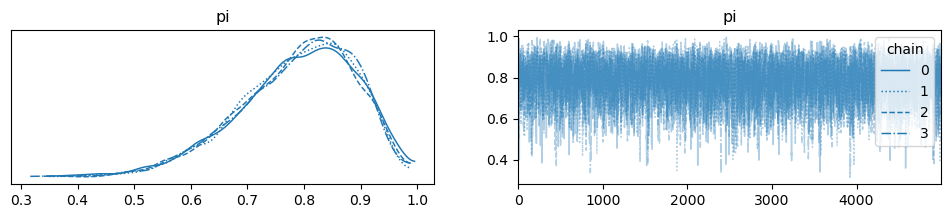

In [2]:
ax = az.plot_trace(trace, legend = True)

绘制自相关图  

- 可以看到，随着间隔的下降，自相关也快速下降

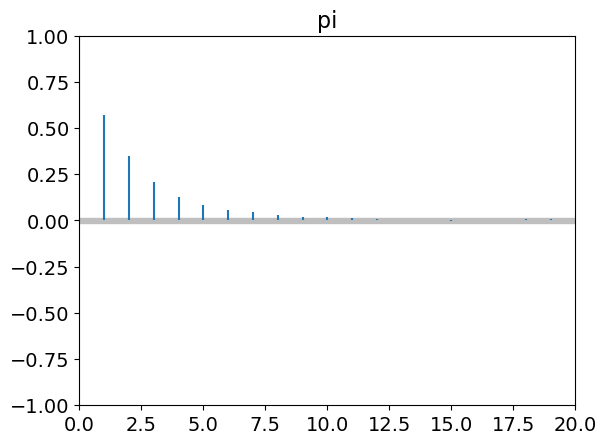

In [7]:
ax = az.plot_autocorr(trace, max_lag=20, combined=True)

我们使用 arviz 的 `summary`来获得对于 MCMC 链的 R-hat和 有效样本量 ESS 指标。  

- 可以看到 r-hat 接近1，表明链间和各链内的变异的一致性。  
- 有效样本量 ESS (ess_bulk) 为 4744，有效样本量比率 4744/5000 = 0.95，远大于 0.1。

In [9]:
az.summary(trace, kind = "diagnostics")

,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
pi,0.001,0.001,4744.0,4366.0,1.0


虽然示例的 trace 不存在强烈的自相关，但我们演示如何通过 thin 参数来使得采样更薄，从而减少链的自相关。  

- 我们设置 thin 为10，即每隔10保留一个参数，这导致样本数量只有之前的 1/10，即500  
- 可以看到，自相关几乎不存在了。

In [10]:
thinned_trace = trace.sel(draw=slice(None, None, 10))

# 注意，thinned_trace 只有 500个采样
thinned_trace.posterior

<xarray.Dataset>
Dimensions:  (chain: 4, draw: 500)
Coordinates:
  * chain    (chain) int32 0 1 2 3
  * draw     (draw) int32 0 10 20 30 40 50 60 ... 4940 4950 4960 4970 4980 4990
Data variables:
    pi       (chain, draw) float64 0.6946 0.9428 0.8367 ... 0.8636 0.8551 0.8676
Attributes:
    created_at:                 2024-10-30T01:47:15.618820
    arviz_version:              0.17.1
    inference_library:          pymc
    inference_library_version:  5.16.2
    sampling_time:              31.287054538726807
    tuning_steps:               0

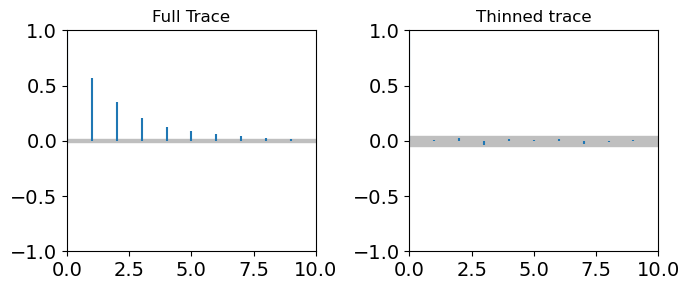

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(7, 3))

az.plot_autocorr(trace, max_lag=10, combined=True, ax=axes[0])
axes[0].set_title('Full Trace')
az.plot_autocorr(thinned_trace, max_lag=10, combined=True, ax=axes[1])
axes[1].set_title('Thinned trace')

plt.tight_layout()
plt.show()

## Posterior estimation  

当我们确定 MCMC 采样的结果的可信后，我们就可以将其**当作后验分布**进行统计推断。

在此之前，我们需要回顾后验分布的含义和意义。

**在贝叶斯的框架下，我们可以把后验分布看作是对成功次数$\pi$的一种估计，即当前数据更可能在哪一种$\pi$下出现。**  

> 🤔当你看到这个后验分布时，你觉得它描述了关于$\pi$怎样的一种信息呢？  
> * a. 参与者正确判断的概率大概在80%  
> * b. 参与者正确判断的概率比例最有可能是80%，但这个比例也可能是60%到99%中的某一个。  

In [3]:
# 导入数字和向量处理包：numpy
import numpy as np
# 导入基本绘图工具：matplotlib
import matplotlib.pyplot as plt
# 导入高级绘图工具 seaborn 为 sns
import seaborn as sns
# 导入概率分布计算和可视化包：preliz
import preliz as pz

def bayesian_analysis_plot(
    alpha, beta, y, n, 
    ax=None, 
    plot_prior=True, 
    plot_likelihood=True, 
    plot_posterior=True, 
    xlabel=r"$\pi$", 
    show_legend=True,
    legend_loc="upper left"):
    """
    该函数绘制先验分布、似然分布和后验分布的 PDF 图示在指定的子图上。
    
    参数:
    - alpha: Beta 分布的 alpha 参数（先验）
    - beta: Beta 分布的 beta 参数（先验）
    - y: 观测数据中的支持次数
    - n: 总样本数
    - ax: 子图对象，在指定子图上绘制图形
    """

    if ax is None:
        ax = plt.gca()

    if plot_prior:
        # 先验分布
        prior = pz.Beta(alpha, beta)
        prior.plot_pdf(color="black", ax=ax, legend="None")
        x_prior = np.linspace(prior.ppf(0.0001), prior.ppf(0.9999), 100)
        ax.fill_between(x_prior, prior.pdf(x_prior), color="#f0e442", alpha=0.5, label="prior")

    if plot_likelihood:
        # 似然分布 (两种写法等价)
        # likelihood = pz.Beta(y,n-y)
        # likelihood.plot_pdf(color="black", ax=ax, legend="None")
        x = np.linspace(0,1,1000)
        likelihood = pz.Binomial(n=n, p=y/n).pdf(x=x*n)
        likelihood = likelihood * n
        ax.plot(x, likelihood, color="black", label=r"$\mathbf{Binomial}$"+rf"(n={n},p={round(y/n,2)})")
        ax.fill_between(x, likelihood, color="#0071b2", alpha=0.5, label="likelihood")

    if plot_posterior:
        # 后验分布
        posterior = pz.Beta(alpha + y, beta + n - y)
        posterior.plot_pdf(color="black", ax=ax, legend="None")
        x_posterior = np.linspace(posterior.ppf(0.0001), posterior.ppf(0.9999), 100)
        ax.fill_between(x_posterior, posterior.pdf(x_posterior), color="#009e74", alpha=0.5, label="posterior")

    if show_legend:
        ax.legend(loc=legend_loc)
    else:
        ax.legend().set_visible(False)

    # 设置图形
    ax.set_xlabel(xlabel)
    sns.despine()


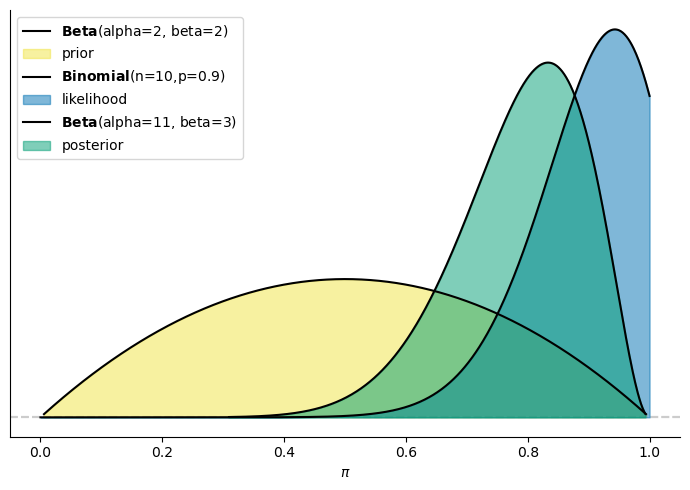

In [4]:
# 创建一个单独的图和轴
fig, ax = plt.subplots(figsize=(7, 5))

# 先验参数 alpha=2, beta=2, 观测数据 y=9, n=10
bayesian_analysis_plot(alpha=2, beta=2, y=9, n=10, ax=ax) 

# 显示图像
plt.tight_layout()
plt.show()

**选项b是更符合贝叶斯取向的回答**。 为什么？ ➡  

* 我们来考虑另一种调查情况下得出的后验分布：  

* 我们对$\pi$的先验仍然为$\pi \sim Beta(2, 2)$，但现在我们的试验总次数为118次，成功次数为99次.  

$$  
\pi \sim Beta(2, 2)  
$$  

$$  
Y | \pi  \sim Bin(118, \pi)  
$$  

$$  
\pi | (y = 99) \sim \text{Beta}(\alpha + y, \beta + n - y)  
$$  

* 这种情况下，$\pi$的后验分布满足$\pi | (Y = 99) \sim Beta(101, 21)$

下图展示了这两种情况下的后验分布  

> 黑线表示众数，即在后验分布中最可能出现的值  

![Image Name](https://cdn.kesci.com/upload/sm3w84q11g.png?imageView2/0/w/700)


* 在这两种分布下，$\pi$最可能的取值都在83-84%左右  

* 如果只关注众数，两种截然不同的情况却会导致相似的结论❌  

* 但很明显，我们可以看到两图中$\pi$的分布范围是不同的  


**为了同时了解$\pi$的集中趋势和离散趋势，我们可以使用 *95%的可信区间(credible intervals)* 来描述$\pi$**

### 可信区间(credible intervals)  

* 后验分布的2.5%百分位数和97.5%百分位数包含的区域共同组成了95%的后验可信区间  

* 可信区间表示了参数出现在这个区域的概率  
    * 比如，Beta(101, 21) 95%的可信区间为(0.756, 0.889)。这意味着我们可以说，在随机点运动任务中参与者成功的真实概率出现在(0.756, 0.889)的可能性是95%  
    * 一种理解是，有95%的人在随机点运动任务中参与者成功概率很高，大概为 0.756 到 0.889。


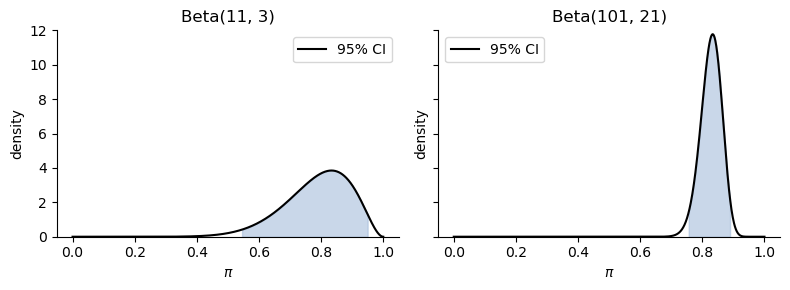

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# 定义 Beta 分布的参数 Beta(101, 21)
params = [(11, 3), (101, 21)]
titles = [r"Beta(11, 3)", r"Beta(101, 21)"]
ci_level = 0.95

# 创建图形和子图
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# 绘制 Beta 分布的 PDF 和 95% CI 区间
for i, (a, b) in enumerate(params):
    x = np.linspace(0, 1, 1000)
    y = beta.pdf(x, a, b)
    ci_lower, ci_upper = beta.ppf([(1 - ci_level) / 2, (1 + ci_level) / 2], a, b)
    x2 = np.linspace(ci_lower, ci_upper, 1000)
    y2 = beta.pdf(x2, a, b)

    # 绘图
    axes[i].plot(x, y, color='black', label=f'{int(ci_level*100)}% CI')
    axes[i].fill_between(x2, y2, color='#a6bddb', alpha=0.6)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(r"$\pi$")
    axes[i].set_ylabel("density")
    axes[i].set_ylim(0, 12)  
    
    # 隐藏上部和右部的边框
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    # 添加图例
    axes[i].legend()

# 调整子图布局
plt.tight_layout()
plt.show()


**在报告可信区间时，95%是最常见的选项，但并不是唯一的选项。** 

* 我们也可以创建其他可信区间，比如Beta(101, 21)的分布之下：  
	* 50% 可信区间：由25%百分位数和75%百分位数包含的区域  
	* 99%可信区间：由0.5%百分位数和99.5%百分位数包含的区域  

> 在95%CI的图中，由于后验分布是一个偏态分布，可以看到相较于前半部分，后半部分包含的值对应的概率更低。  
> 当后验分布是偏态分布时，有时我们不以中位数为中心构建95%的可信区间，而是基于最高后验概率密度(众数)。  


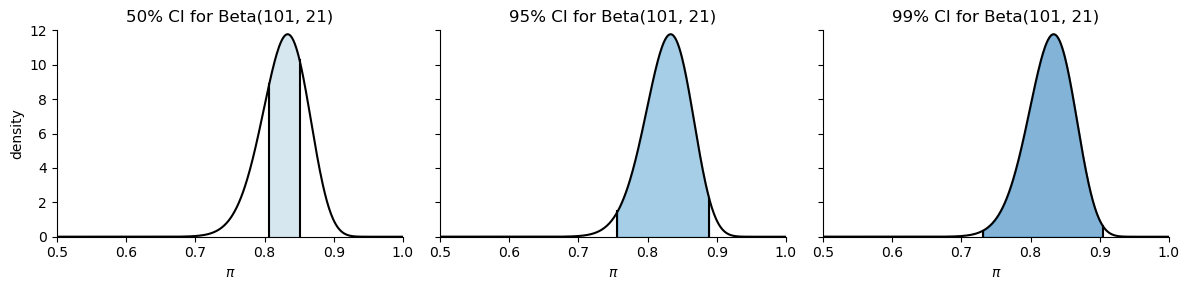

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# 定义 Beta 分布的参数 Beta(101, 21)
a, b = 101, 21
x = np.linspace(0, 1, 1000)
y = beta.pdf(x, a, b)

# 设置三个不同的可信区间
ci_levels = {
    "50% CI": (0.25, 0.75),
    "95% CI": (0.025, 0.975),
    "99% CI": (0.005, 0.995)
}
ci_colors = ['#bdd7e7', '#6baed6', '#3182bd']  # Colors for 50%, 95%, and 99% CI

# 为每个可信区间创建子图
fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True)

# 绘制每个可信区间
for i, (ci_name, (lower_percentile, upper_percentile)) in enumerate(ci_levels.items()):
    # 计算可信区间的上下界
    ci_lower, ci_upper = beta.ppf([lower_percentile, upper_percentile], a, b)

    # 绘制分布曲线并填充可信区间
    axes[i].plot(x, y, color='black')
    axes[i].fill_between(x, y, where=(x >= ci_lower) & (x <= ci_upper), color=ci_colors[i], alpha=0.6)
    axes[i].set_title(f"{ci_name} for Beta(101, 21)")
    axes[i].set_xlabel(r"$\pi$")
    axes[i].set_ylim(0, 12)
    
    # 绘制可信区间的垂直线
    y_ci_lower = beta.pdf(ci_lower, a, b)
    y_ci_upper = beta.pdf(ci_upper, a, b)
    axes[i].axvline(ci_lower, color='black', linestyle='-', ymax=y_ci_lower / max(y))
    axes[i].axvline(ci_upper, color='black', linestyle='-', ymax=y_ci_upper / max(y))
    
    # 移除顶部和右侧的边框
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

    axes[i].set_xlim(0.5, 1)

# 设置 y 轴标签
axes[0].set_ylabel("density")

# 调整布局
plt.tight_layout()
plt.show()


### 最大后验概率密度区间(the highest density interval, HDI)  

最大概率密度区间HDI与中心区间是非常接近的。但是当后验分布为非正态分布时，两者存在区别，比如：  


![Image Name](https://cdn.kesci.com/upload/image/rjdef48vqj.png?imageView2/0/w/640/h/640)  

- 此时，后验中心区间从中位数的两侧开始展开。  
- 而最大概率密度区间HDI从y轴最高的两处开始展开。  

直觉理解：想象有一根水平的线从后验概率密度最高点往下滑，如果是95%HDI，则意味着黄色部分的面积占曲线下面积的95%  

![Image Name](https://cdn.kesci.com/upload/s37y41n2yf.png?imageView2/0/w/640/h/640)  

> source: https://mathematica.stackexchange.com/questions/173282/computing-credible-region-highest-posterior-density-from-empirical-distributio

<div style="padding-bottom: 30px;"></div>

### 95% CI vs 95%HDI  

![Image Name](https://cdn.kesci.com/upload/s36vflrg1f.png?imageView2/0/w/960/h/960) 

### 总结  

随着我们的贝叶斯模型越来越复杂，比如，一个回归模型加入越来越多的预测变量。

这些模型的**后验将变得难以直接获得，或者无法获得**。  

我们学习了在这种情况下逼近后验的两种模拟技术：  
- 网格逼近和马尔科夫链蒙特卡罗。  
- 两种技术都会产生 N 个 $\Theta$ 参数值样本。注意，这里的 $\Theta$  可能包含多个参数。  

最后，我们学到了一些用于检查 MCMC 模拟质量的诊断方法。  
- 可视化：直观地检查多个并行链的轨迹图和密度图，以确定模拟的稳定性和混合性。  
- 数学指标：用有效样本量比、自相关性和 $\hat{R}$等数值诊断来补充这些视觉诊断。

此外，非正态分布后验的平均值，中位数和众数并不相等。  

- 其中众数为分布最高点对应的参数值  
- 中位数左右两侧分布的面积各占50%  
- 平均值的位置接近中位数，并且它容易分布形态的影响  

![Image Name](https://cdn.kesci.com/upload/image/rjddhc2wo.png?imageView2/0/w/500/h/500)  

> source: book--A Student’s Guide to Bayesian Statistics

<div style="padding-bottom: 20px;"></div>

## Posterior hypothesis testing  

后验推断能告诉我们 “反应的正确率为多少”的估计范围。

但在传统的研究思路中，我们非常关心的是“正确率是否大于随机水平50%”（即虚无假设显著性检验），假如我们需要完成同样的推断，在贝叶斯框架下应该如何选择？

* HDI + ROPE (最高密度区间 + 预设效应范围): 在贝叶斯分析中，HDI（Highest Density Interval）代表后验分布中概率最高的区间，而ROPE（Region of Practical Equivalence）则是一个预设的效果范围，用于判断效果是否具有实际意义。当HDI与ROPE重叠时，说明结果在实际应用中可能不显著；反之，则可能具有实际意义。


> Heck, D. W., Boehm, U., Böing-Messing, F., Bürkner, P.-C., Derks, K., Dienes, Z., Fu, Q., Gu, X., Karimova, D., Kiers, H. A. L., Klugkist, I., Kuiper, R. M., Lee, M. D., Leenders, R., Leplaa, H. J., Linde, M., Ly, A., Meijerink-Bosman, M., Moerbeek, M., … Hoijtink, H. (2023). A review of applications of the bayes factor in psychological research. Psychological Methods, 28(3), 558–579. https://doi.org/10.1037/met0000454


* Bayes Factor (贝叶斯因子): 贝叶斯因子是用于比较两种假设（通常是虚无假设与备择假设）相对支持程度的比率。它衡量的是数据在这两种假设下的解释能力。一个大于1的贝叶斯因子表示数据支持备择假设，而小于1则表示支持虚无假设。贝叶斯因子提供了一种量化不确定性的方法，能够帮助我们更好地理解结果的可靠性。


> Kruschke, J. K. (2018). Rejecting or accepting parameter values in bayesian estimation. Advances in Methods and Practices in Psychological Science, 1(2), 270–280. https://doi.org/10.1177/2515245918771304


>🤔假设我们在一篇报道中看到这样一种描述：在随机点运动任务中，成功次数占比为80%。 
> 如何根据这个数据结果判断改成功率是否大于随机判断水平 50% 呢？  


* 我们同时考虑两种可能性：成功次数 $\pi$ 的比例是否与 50% 相同，此时备择假设和虚无假设可以写成：  
$$  
\begin{split}  
H_0: & \; \; \pi = 0.5 \\  
H_a: & \; \; \pi \ne 0.5 \\  
\end{split}  
$$  


### 1. 通过 HDI 进行检验

假设我们沿用之前的例子，并且已经知道先验分布为 $Beta(2, 2)$； 后验分布为 $Beta(101, 21)$。

为了检验 $\pi$ 是否显著不同于 0.5，我们可以计算 **后验分布的 HDI**（Highest Density Interval），这是一种包含后验分布中最高概率密度的区间。通常 HDI 表示一个区间，比如 95% HDI，意味着该区间包含了后验分布中的 95% 的概率质量。

**求解 HDI**

HDI 是后验分布中包含最高密度的区间，我们通常计算 95% HDI，这意味着该区间包含后验分布中 95% 的概率质量。HDI 的定义要求该区间 $[\pi_\text{low}, \pi_\text{high}]$ 满足以下条件：

1. 对于任何 $\pi$ 在区间 $[\pi_\text{low}, \pi_\text{high}]$ 外的点，它的密度都小于区间内的点的密度，即：

$$f(\pi_\text{low} | \alpha, \beta) = f(\pi_\text{high} | \alpha, \beta)$$

1. 该区间内的概率质量为 95%：

$$\int_{\pi_\text{low}}^{\pi_\text{high}} f(\pi | \alpha, \beta) d\pi = 0.95$$

Arviz 提供计算 HDI 的方法 `arviz.summary`，通过这种方法，我们可以计算出后验分布 $Beta(101, 21)$ 的 95% HDI 区间。

**结果解释**

经过计算，得到的 95% HDI 区间为 $[0.76, 0.89]$。接下来，我们要验证这个区间是否包含 0.5：

- 该区间为 $[0.76, 0.89]$。
- 0.5 不在这个区间内。

因此，95% HDI 区间不包含 0.5，这表明在 95% 的可信水平下，成功率 $\pi$ 与 0.5 存在显著差异。基于这一结果，我们可以拒绝虚无假设 $H_0: \pi = 0.5$，并认为成功率 $\pi$ 显著不同于 0.5。

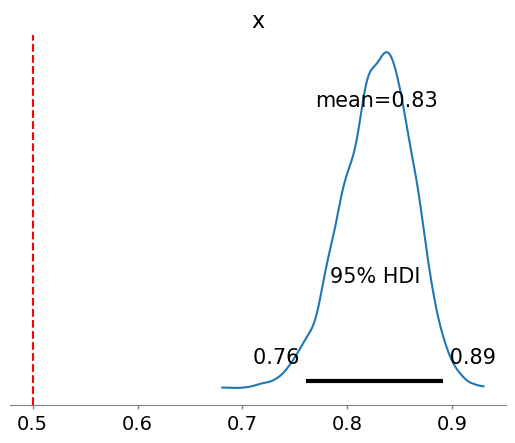

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import scipy.stats as stats

# 生成 Beta 分布的样本
alpha = 101
beta = 21
samples = np.random.beta(alpha, beta, 10000)

# 使用 arviz 绘制后验分布图
az.plot_posterior(samples, hdi_prob=0.95)

# 添加 x=0.5的竖线
plt.axvline(x=0.5, color='red', linestyle='--')

# 显示图形
plt.show() 

### 2. 通过 HDI + ROPE 进行检验

**ROPE**（Region of Practical Equivalence，实际等效区间）是一种贝叶斯统计中的概念，用来定义在实践中认为与虚无假设无显著差异的区域。通过结合 HDI 和 ROPE，我们可以进一步检验成功率 $\pi$ 是否在实践中显著不同于 0.5。


在这个例子中，我们假设 ROPE 的范围为 $[0.4, 0.6]$。这意味着如果成功率 $\pi$ 落入这个区间，我们认为 $\pi$ 在实践中与随机判断水平 0.5 没有显著差异。因此，我们的目标是判断 95% HDI 区间是否完全落在 ROPE 内，完全在 ROPE 外，或者部分重合。

> 注意：ROPE需要我们根据具体情况进行调整。 一般情况下需要参考经验值或文献中的建议。

**检验步骤**


我们已经知道 95% HDI 区间为 $[0.76, 0.89]$。接下来，我们需要将这个区间与 ROPE 区间 $[0.4, 0.6]$ 进行比较：

- HDI 区间为 $[0.76, 0.89]$。
- ROPE 区间为 $[0.4, 0.6]$。

接下来，我们考虑三种可能的情况：

- **HDI 完全落在 ROPE 之内**：如果 95% HDI 完全在 $[0.4, 0.6]$ 之内，那么可以认为 $\pi$ 在实践中与 0.5 无显著差异。
- **HDI 完全落在 ROPE 之外**：如果 95% HDI 完全在 $[0.4, 0.6]$ 之外，那么可以认为 $\pi$ 在实践中显著不同于 0.5。
- **HDI 与 ROPE 部分重合**：如果 95% HDI 区间与 ROPE 有部分重合，那么可以认为不确定 $\pi$ 是否显著不同于 0.5。

**结果分析**

在我们的例子中，HDI 区间 $[0.76, 0.89]$ 完全位于 ROPE 区间 $[0.4, 0.6]$ 之外。这意味着我们可以认为 $\pi$ 在实践中与 0.5 存在显著差异，且成功率 $\pi$ 显著高于 50%。

HDI 区间 $[0.76, 0.89]$ 完全落在 ROPE 之外，这表明成功率 $\pi$ 在实践中显著不同于随机判断水平 0.5。结合 HDI 和 ROPE 的结果，我们可以进一步确认成功率 $\pi$ 显著高于 0.5。

因此，基于 HDI + ROPE 的检验结果，我们可以认为成功率 $\pi$ 不仅在统计学上（通过 HDI 检验），而且在实践中（通过 ROPE 检验）都显著不同于 50%。

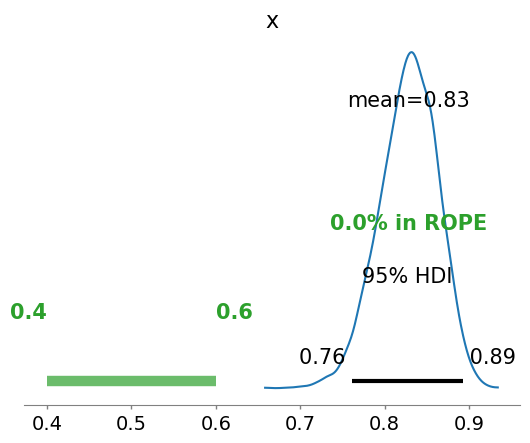

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

# 生成 Beta 分布的样本
alpha = 101
beta = 21
samples = np.random.beta(alpha, beta, 10000)

# 使用 arviz 绘制后验分布图，并添加 ROPE 区间
az.plot_posterior(samples, hdi_prob=0.95, rope=[0.4, 0.6])

# 显示图形
plt.show()

### 贝叶斯因子(Bayes Factor, BF)  

贝叶斯因子是用于比较两种假设（通常是虚无假设和备择假设）相对支持程度的一个量化工具。它通过计算在两种假设下观察到的数据的概率，来评估这些假设的相对可信度。

从先验到后验，**数据**让备择假设的相对可能性发生了改变。  

我们可以使用**贝叶斯因子**来量化**数据**对我们信念更新的程度：  

$$
\begin{align*}
\text{Bayes Factor} &= \frac{\text{posterior odds }}{\text{prior odds }} \\
&= \frac{\text{后验概率比}}{\text{先验概率比}}  \\
&= \frac{P(H_a | Y) / P(H_0 | Y)}{P(H_a) / P(H_0)}  
\end{align*}
$$


* $BF_{a0}$ = 1，收集到的数据并没有改变备择假设$H_a$的相对可能性  
* $BF_{a0}$ > 1，收集到的数据增加了备择假设$H_a$的相对可能性。BF越大，表明支持备择假设$H_a$的证据越强  
* $BF_{a0}$ < 1，收集到的数据削弱了备择假设$H_a$的相对可能性。BF越小，表明支持备择假设$H_a$的证据越弱  

|**贝叶斯因子** |**解读**|  
|-|-|  
|> 100|极强的证据支持$H_a$|  
|30 ~ 100|非常强的证据支持$H_a$|  
|10 ~ 30|较强的证据支持$H_a$|  
|3 ~ 10|中等程度的证据支持$H_a$|  
|1 ~ 3|较弱的证据支持$H_a$|  
|1|没有证据|  
|1/3 ~ 1|较弱的证据支持$H_0$|  
|1/10 ~ 1/3|中等程度的证据支持$H_0$|  
|1/30 ~ 1/10|较强的证据支持$H_0$|  
|1/100 ~ 1/30|非常强的证据支持$H_0$|  
|< 1/100|极强的证据支持$H_0$|  

> Source: 该表改编自胡传鹏等(2018)，源引用于Lee & Wagenmakers (2014)。

### 3. 通过贝叶斯因子 (Bayes Factor, BF) 进行检验

回到之前的例子，我们已知$\pi = 0.8$是成功事件发生的概率，先验分布为 $Beta(2, 2)$； 后验分布为 $Beta(101, 21)$。


* 但此时我们会遇到一个问题，因为$\pi$的后验分布是连续的，对于连续型变量，单个值发生的概率为0(一条线)：  
$$  
P(\pi = 0.8 | Y) = \int_{0.8}^{0.8} f(\pi | y)d\pi = 0  
$$  

* 那么备择假设发生的概率为：  
$$  
P(\pi \ne 0.8 | Y) = 1 - P(\pi = 0.8 | Y) = 1  
$$  

* 此时如果我们仍然沿用刚刚的公式计算后验概率比：  
$$  
\text{Posterior odds } = \frac{P(H_a \; | \; Y)}{P(H_0 \; | \; Y)} = \frac{1}{0} = \text{ nooooo!}  
$$  


既然在连续型变量中，考虑单个值的概率会遇到计算上的问题，我们需要引入**区间**来计算贝叶斯因子，比如使用 ROPE 的范围，检验成功次数比例$\pi$是否在(0.4, 0.6)这个区间内：  

$$  
\begin{split}  
H_0: & \; \; \pi \in (0.4, 0.6) \\  
H_a: & \; \; \pi \notin (0.4, 0.6) \\  
\end{split}  
$$  

**贝叶斯因子假设检验公式**

$$
BF = \frac{P(H0|Y)/P(H0)}{P(H1|Y)/P(H0)}
$$

* 注意：我们需要为 H0 和 H1 设置先验概率，这里我们假设两者出现的概率为 0.5, $P(H0) = 0.5$, $P(H1) = 0.5$。



**贝叶斯因子的计算**


首先，我们需要确定 $\pi$ 在 ROPE 范围 $(0.4, 0.6)$ 内的概率，即：

$$
\begin{align*}
P(H0|Y) &= P(0.4 \leq \pi \leq 0.6 | Y) = \int_{0.4}^{0.6} f(\pi | Y) d\pi \\
\end{align*}
$$

- 其中 $f(\pi | Y)$ 是 $\pi$ 的后验密度函数。根据我们的后验分布 $Beta(101, 21)$，我们可以使用积分或数值方法来求解具体数值。

与此同时，我们考虑 $(0.4, 0.6)$ 之外的概率，即 $P(\pi \notin (0.4, 0.6) | Y)$，通过：

$$
P(H1|Y) = P(\pi \notin (0.4, 0.6) | Y) = 1 - P(H0|Y)
$$

现在我们可以根据下式计算贝叶斯因子（BF）：

$$
\text{Bayes Factor } = \frac{P(0.4 \leq \pi \leq 0.6 | Y)/P(H0)}{P(\pi \notin (0.4, 0.6) | Y)/P(H1)}
$$

**由于两种假设下先验分布相同，$P(H0) = P(H1) = 0.5$，因此可以简化计算为：**

$$
\text{Bayes Factor } = \frac{P(0.4 \leq \pi \leq 0.6 | Y)}{P(\pi \notin (0.4, 0.6) | Y)}
$$


**结果分析**


计算 $P(0.4 \leq \pi \leq 0.6 | Y)$ 可以用贝塔分布的累积分布函数（CDF）进行:

$$P(0.4 \leq \pi \leq 0.6 | Y) = F(0.6) - F(0.4)$$

- 其中 $F$ 是以$ Beta$ 分布(101,21)累积分布函数。则，

$$P(0.4 \leq \pi \leq 0.6 | Y) \approx 0.022 - 0.0003 = 0.0217$$

因此，$P(\pi \notin (0.4, 0.6) | Y) = 1 - 0.0217 = 0.9783$。

计算贝叶斯因子（BF）:
$$\text{Bayes Factor} = \frac{P(0.4 \leq \pi \leq 0.6 | Y)}{P(\pi \notin (0.4, 0.6) | Y)} \approx \frac{0.0217}{0.9783} \approx 0.0222$$

贝叶斯因子的值约为 $0.0222$，这意味着备择假设 $H_a$ ($\pi$ 不在 $(0.4, 0.6)$ 区间内) 相对于原假设 $H_0$ ($\pi$ 在 $(0.4, 0.6)$ 区间内) 获得了极大的支持。这个结果表明，给定数据和先验信息，$\pi$ 值显著不在 $(0.4, 0.6)$ 区间内，大大倾向于 $\pi$ 的真实值远离 $0.5$，这与 $\pi = 0.8$ 的假设一致。

因此，我们可以结论认为，在给定的统计模型和数据条件下，成功率 $\pi = 0.8$ 是显著高于一般随机判断水平（$0.5$），这进一步强化了 $\pi$ 显著高于 $0.5$ 的结论。此结果对于决策支持和进一步的统计分析具有重要意义。

**额外补充：单侧检验**  

贝叶斯后验模型可以直接进行单侧检验，例如要检验成功率小于80%的假设，我们只需要计算后验分布中$\pi$小于80%的概率即可。  

* 那么，我们可以考虑在后验分布$Beta(101，21)$中，$\pi$小于0.8的概率  
$$  
P(\pi < 0.8 \; | \; Y = 99) = \int_{0}^{0.8}f(\pi | y=99)d\pi .  
$$  

(如图，可以理解为$\pi$从0 ~ 0.8围成的曲线下面积)  

![Image Name](https://cdn.kesci.com/upload/sm3ylkxvv1.png?imageView2/0/w/720/h/960)

经计算可知，在$Beta(101, 21)$中，$\pi$小于0.8的概率是20.2%


<div style="padding-bottom: 30px;"></div>


**单侧检验--假设检验**

如果我们把这个问题放到假设检验的框架下，那么这个问题可以写成：  

* 虚无假设 ($H_0$)：在随机点运动任务中，成功次数占比等于0.8（即80%）
* 备择假设 ($H_1$)：在随机点运动任务中，成功次数占比大于0.8（即80%）

$$  
\begin{split}  
H_0: & \; \; \pi \ge 0.8 \\  
H_a: & \; \; \pi < 0.8 \\  
\end{split}  
$$  

我们可以计算出这两个假设对应的后验概率：  

* 备择假设：$\pi < 0.8$  
$$  
P(H_a \; | \; Y=99) = 0.202  
$$  

* 虚无假设：$\pi \ge 0.8$  
$$  
P(H_0 \; | \; Y=99) = 1-P(H_a \; | \; Y=99) = 0.798
$$  

将这二者相除，我们可以知道备择假设发生的可能性大约是虚无假设的3倍，这被称为**后验概率比(posterior odds)**  

$$  
\text{posterior odds } = \frac{P(H_a \; | \; Y=99)}{P(H_0 \; | \; Y=99)} \approx 0.253.  
$$  


我们说$\pi$的后验概率表现了对$\pi$信念在数据与先验之间的平均更新，那么我们可以看一下在**先验分布** $Beta(2,2)$ 中，虚无假设和备择假设发生的可能性  

* 备择假设：$\pi < 0.8$  
$$  
P(H_a) = \int_0^{0.8} f(\pi) d\pi \approx 0.8  
$$  

* 虚无假设：$\pi \ge 0.8$  
$$  
P(H_0) = 1-P(H_a) \approx 0.2 
$$  

* 先验概率比：  
$$  
\text{Prior odds } = \frac{P(H_a)}{P(H_0)} \approx 4
$$


> $$  
> \text{posterior odds } \approx 0.253
> $$  
> $$  
> \text{Prior odds } \approx 4  
> $$  

从先验到后验，**数据**让备择假设的相对可能性发生了改变。  

我们可以使用**贝叶斯因子**来量化**数据**对我们信念更新的程度：  

$$  
\text{Bayes Factor} = \frac{\text{posterior odds }}{\text{prior odds }} = \frac{\text{后验概率比}}{\text{先验概率比}}  
$$  

代入我们的数据中  
$$  
\text{Bayes Factor} = \frac{0.253}{4} \approx 0.063
$$  

* 在这个例子中，贝叶斯因子大约是0.063，这表明，数据对虚无假设的支持度实际上是大于备择假设的，相比先验分布，数据使得备择假设相对虚无假设的支持度下降了。


综上，后验概率 $P(H_a \; | \; Y=99) = 0.202$  表示数据对备择假设$H_a$ 的支持度是20.2%，反映出数据并未提供有力证据来支持成功率低于 80% 的假设。这与频率主义统计方法的决策机制不同：

* 不同于我们曾经在频率主义框架下所做的那样：根据*p*值的大小拒绝或无法拒绝零假设。  

* 在贝叶斯学派中，不提倡一刀切标准。数据可以告诉我们后验概率或贝叶斯因子，从而告诉我们证据有多**强**。它只是衡量不同的假设发生的相对可能性。


<div style="padding-bottom: 30px;"></div>

## Summary and discussion  

<p align="center">
  <img src="https://cdn.kesci.com/upload/sm7veon5ei.png?imageView2/0/w/720/h/960" alt="Image Name">
</p>

本节课我们学习了如何利用精确或近似的后验模型，对未知参数进行统计分析，包括：  
1. 后验预测(均值和可信区间)  
2. 基于后验的假设检验  
3. 后验预测  

😎到这里你或许发现了贝叶斯的独特之处，相比于之前学习的基于频率学派(frequentists)的统计方法。

<div style="padding-bottom: 20px;"></div>

贝叶斯分析结果的易解释性 -- 样本和总体的关系  

- 贝叶斯分析根据观察到的数据 Y 来评估未知参数 π 的不确定性。  
    
    - 例如，在随机点运动任务中，有 118 次尝试，其中 99 次成功完成任务。
    - 根据这一观察结果，我们确定在随机点运动任务中成功完成的比例 π 低于 0.80 的后验概率为 20.2%  
        
- 在频数分析中，往往根据对于总体性质π的假定值来评估观测样本Y的不确定性。  
    
    - 频率学派假设只要无限(long-run)的进行抽样，样本分布的参数就会近似总体分布。  
    - 然后，根据零假设显著性检验(Null Hypothesis Significance Testing)和 p 值来判断样本和总体的关系。  
    - 例如，频率学派假设 π 为 0.80时，我们观察到的样本(118 次尝试)中，有 Y = 99 次的成功次数，那么这一结果可能会被视为样本与总体的差异。
        

假设检验的哲学基础是波普尔的科学可证伪性  
  - 它所回答的问题对人脑来说却**不那么自然**：因为我们实际上观察到了数据，但却不知道π，所以要解释一个假设相反的计算结果，可能会让人费解。  
  - 然而，在检验假设时，更自然的做法是问 "我的假设有多大可能性？(贝叶斯概率的答案），
  - 而不是 "如果我的假设不成立，我的数据的可能性有多大？(频繁概率的答案）。  
  - 鉴于P值经常被曲解，进而被误用，整个频繁主义和贝叶斯理论都越来越不强调P值。